In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# Initialize a dictionary to store data for each signal
signals_data = {}

# Read the file line by line
with open('Data/VW3_20250123_Vijzel1.txt', 'r') as file:
 lines = file.readlines()

# Variables to keep track of the current signal
current_signal = None

# Process each line
for line in lines:
 if line.startswith("SignalInfo\t"):
  current_signal = line.strip().split('\t')[1]
  signals_data[current_signal] = []
 elif current_signal:
  if line.startswith("SignalInfo"):
   break
  signals_data[current_signal].append(line.strip().split('\t'))

signals_data

{'Vulwagen_3_Local_4_I_PresentValue_0_': [['23/01/2025 12:00:29.448',
   '73211',
   'True'],
  ['23/01/2025 12:00:29.948', '73211', 'True'],
  ['23/01/2025 12:00:30.448', '73211', 'True'],
  ['23/01/2025 12:00:30.948', '73211', 'True'],
  ['23/01/2025 12:00:31.448', '73211', 'True'],
  ['23/01/2025 12:00:31.948', '73211', 'True'],
  ['23/01/2025 12:00:32.448', '73211', 'True'],
  ['23/01/2025 12:00:32.948', '73211', 'True'],
  ['23/01/2025 12:00:33.448', '73211', 'True'],
  ['23/01/2025 12:00:33.948', '73211', 'True'],
  ['23/01/2025 12:00:34.448', '73211', 'True'],
  ['23/01/2025 12:00:34.948', '73211', 'True'],
  ['23/01/2025 12:00:35.448', '73211', 'True'],
  ['23/01/2025 12:00:35.948', '73211', 'True'],
  ['23/01/2025 12:00:36.448', '73211', 'True'],
  ['23/01/2025 12:00:36.948', '73211', 'True'],
  ['23/01/2025 12:00:37.448', '73211', 'True'],
  ['23/01/2025 12:00:37.948', '73211', 'True'],
  ['23/01/2025 12:00:38.448', '73211', 'True'],
  ['23/01/2025 12:00:38.948', '73211', 'Tr

In [5]:
# Create a DataFrame with timestamp as index and a column for each signal
df = pd.DataFrame()

# Itereer over elke key in de dictionary
## Haal de datums en waarden op
## Maak een tijdelijke dataframe met datums als index en waarden als kolom
## Voeg de tijdelijke dataframe samen met de hoofd dataframe
 
for key in signals_data.keys():
 timestamp = [item[0] for item in signals_data[key]]
 value = [item[1] for item in signals_data[key]]
 status = [item[2] for item in signals_data[key]]
 
 temp_df = pd.DataFrame(value, index=pd.to_datetime(timestamp, dayfirst=True), columns=[key])
 df = pd.merge(df, temp_df, left_index=True, right_index=True, how='outer')

# print(df.head())

# Sorteer de dataframe op index (datums)
df.sort_index(inplace=True)

# Print de resulterende dataframe
df.head()
# df.info()
# df.columns
# df.index

,Vulwagen_3_Local_4_I_PresentValue_0_,Vulwagen_3_Plaats_VW3,Vulwagen_3_X02_A302_172_20_1_108_11_I_Ch2Data,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_2,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_3,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_0
2025-01-23 11:59:45.838,NaN,NaN,NaN,1,1,0
2025-01-23 12:00:28.573,NaN,201,NaN,NaN,NaN,NaN
2025-01-23 12:00:29.448,73211,NaN,"4,65980052947998",NaN,NaN,NaN
2025-01-23 12:00:29.470,NaN,200,NaN,NaN,NaN,NaN
2025-01-23 12:00:29.948,73211,NaN,"4,65980052947998",NaN,NaN,NaN


In [6]:
# Vervangt alle NaN-waarden met de vorige waarde in de kolom
df.ffill(inplace=True)

df.head()

,Vulwagen_3_Local_4_I_PresentValue_0_,Vulwagen_3_Plaats_VW3,Vulwagen_3_X02_A302_172_20_1_108_11_I_Ch2Data,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_2,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_3,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_0
2025-01-23 11:59:45.838,NaN,NaN,NaN,1,1,0
2025-01-23 12:00:28.573,NaN,201,NaN,1,1,0
2025-01-23 12:00:29.448,73211,201,"4,65980052947998",1,1,0
2025-01-23 12:00:29.470,73211,200,"4,65980052947998",1,1,0
2025-01-23 12:00:29.948,73211,200,"4,65980052947998",1,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60937 entries, 2025-01-23 11:59:45.838000 to 2025-01-23 20:00:28.948000
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Vulwagen_3_Local_4_I_PresentValue_0_           60935 non-null  object
 1   Vulwagen_3_Plaats_VW3                          60936 non-null  object
 2   Vulwagen_3_X02_A302_172_20_1_108_11_I_Ch2Data  60935 non-null  object
 3   Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_2  60937 non-null  object
 4   Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_3  60937 non-null  object
 5   Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_0  60937 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


In [8]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60935 entries, 2025-01-23 12:00:29.448000 to 2025-01-23 20:00:28.948000
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Vulwagen_3_Local_4_I_PresentValue_0_           60935 non-null  object
 1   Vulwagen_3_Plaats_VW3                          60935 non-null  object
 2   Vulwagen_3_X02_A302_172_20_1_108_11_I_Ch2Data  60935 non-null  object
 3   Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_2  60935 non-null  object
 4   Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_3  60935 non-null  object
 5   Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_0  60935 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


In [9]:
df.head()

,Vulwagen_3_Local_4_I_PresentValue_0_,Vulwagen_3_Plaats_VW3,Vulwagen_3_X02_A302_172_20_1_108_11_I_Ch2Data,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_2,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_3,Vulwagen_3_Vulgegevens_1_Sequentie_Signalen_0
2025-01-23 12:00:29.448,73211,201,"4,65980052947998",1,1,0
2025-01-23 12:00:29.470,73211,200,"4,65980052947998",1,1,0
2025-01-23 12:00:29.948,73211,200,"4,65980052947998",1,1,0
2025-01-23 12:00:30.448,73211,200,"4,66011428833008",1,1,0
2025-01-23 12:00:30.543,73211,199,"4,66011428833008",1,1,0


In [10]:
# Nieuwe kolomnamen
new_column_names = ['Vijzel1', 'OvenNr', 'dP', 'Kolentoren', 'Toeleggen', 'Vullen']
# Wijzig de kolomnamen
df.columns = new_column_names

df.head()

,Vijzel1,OvenNr,dP,Kolentoren,Toeleggen,Vullen
2025-01-23 12:00:29.448,73211,201,"4,65980052947998",1,1,0
2025-01-23 12:00:29.470,73211,200,"4,65980052947998",1,1,0
2025-01-23 12:00:29.948,73211,200,"4,65980052947998",1,1,0
2025-01-23 12:00:30.448,73211,200,"4,66011428833008",1,1,0
2025-01-23 12:00:30.543,73211,199,"4,66011428833008",1,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60935 entries, 2025-01-23 12:00:29.448000 to 2025-01-23 20:00:28.948000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Vijzel1     60935 non-null  object
 1   OvenNr      60935 non-null  object
 2   dP          60935 non-null  object
 3   Kolentoren  60935 non-null  object
 4   Toeleggen   60935 non-null  object
 5   Vullen      60935 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


In [12]:
df_toclean = df.copy()

In [13]:
df_toclean['Vijzel1'] = pd.to_numeric(df_toclean['Vijzel1'], errors='coerce')
df_toclean['Vijzel1'] = df_toclean['Vijzel1'] / 1000
df_toclean['Vijzel1'] = df_toclean['Vijzel1'].round(1)
df_toclean['OvenNr'] = pd.to_numeric(df_toclean['OvenNr'], errors='coerce')
df_toclean['dP'] = df_toclean['dP'].str.replace(',', '.').astype(float)
df_toclean['dP'] = ((df_toclean['dP']-4)/16) * 1050 - 50
df_toclean['dP'] = df_toclean['dP'].round(3)
df_toclean['Kolentoren'] = df_toclean['Kolentoren'].astype(int).astype(bool)
df_toclean['Toeleggen'] = df_toclean['Toeleggen'].astype(int).astype(bool)
df_toclean['Vullen'] = df_toclean['Vullen'].astype(int).astype(bool)

df_toclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60935 entries, 2025-01-23 12:00:29.448000 to 2025-01-23 20:00:28.948000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Vijzel1     60926 non-null  float64
 1   OvenNr      60935 non-null  int64  
 2   dP          60926 non-null  float64
 3   Kolentoren  60935 non-null  bool   
 4   Toeleggen   60935 non-null  bool   
 5   Vullen      60935 non-null  bool   
dtypes: bool(3), float64(2), int64(1)
memory usage: 2.0 MB


In [14]:
df_toclean.head()

,Vijzel1,OvenNr,dP,Kolentoren,Toeleggen,Vullen
2025-01-23 12:00:29.448,73.2,201,-6.701,True,True,False
2025-01-23 12:00:29.470,73.2,200,-6.701,True,True,False
2025-01-23 12:00:29.948,73.2,200,-6.701,True,True,False
2025-01-23 12:00:30.448,73.2,200,-6.680,True,True,False
2025-01-23 12:00:30.543,73.2,199,-6.680,True,True,False


In [15]:
df_toclean.describe()

,Vijzel1,OvenNr,dP
count,60926.000000,60935.000000,60926.000000
mean,29.482748,188.282727,-6.720879
std,34.101568,41.425040,1.499263
min,0.000000,116.000000,-18.984000
25%,0.000000,155.000000,-6.412000
50%,0.000000,187.000000,-6.371000
75%,71.900000,221.000000,-6.082000
max,75.400000,268.000000,4.718000


In [16]:
# Functie om subsets te maken
def create_subsets(df):
 subsets = []
 start_index = None
 for i in range(len(df)):
  if start_index is None and df['Vullen'].iloc[i] and ~(df['Kolentoren'].iloc[i] | df['Toeleggen'].iloc[i]):
   start_index = i
  elif start_index is not None and df['Vullen'].iloc[i] and df['Toeleggen'].iloc[i]:
   subsets.append(df.iloc[start_index:i])
   start_index = None
 return subsets

In [17]:
# Maak subsets
list_subsets = create_subsets(df_toclean)

In [18]:
len(list_subsets)

39

In [19]:
for subset in list_subsets:
    print(len(subset))

1387
532
526
552
533
579
565
588
560
658
1149
547
675
558
589
571
561
541
529
556
1301
624
520
565
877
526
601
553
639
534
985
576
563
604
675
656
624
670
1394


In [20]:
list_subsets[10]

,Vijzel1,OvenNr,dP,Kolentoren,Toeleggen,Vullen
2025-01-23 14:27:01.701,0.0,201,-6.371,False,False,True
2025-01-23 14:27:01.762,0.0,201,-6.371,False,False,False
2025-01-23 14:27:01.794,0.0,201,-6.371,False,False,True
2025-01-23 14:27:01.948,0.0,201,-6.371,False,False,True
2025-01-23 14:27:02.448,0.0,201,-6.371,False,False,True
...,...,...,...,...,...,...
2025-01-23 14:36:32.448,74.6,201,-7.030,False,False,True
2025-01-23 14:36:32.948,74.6,201,-6.701,False,False,True
2025-01-23 14:36:33.448,74.6,201,-6.680,False,False,True
2025-01-23 14:36:33.948,74.6,201,-6.701,False,False,True


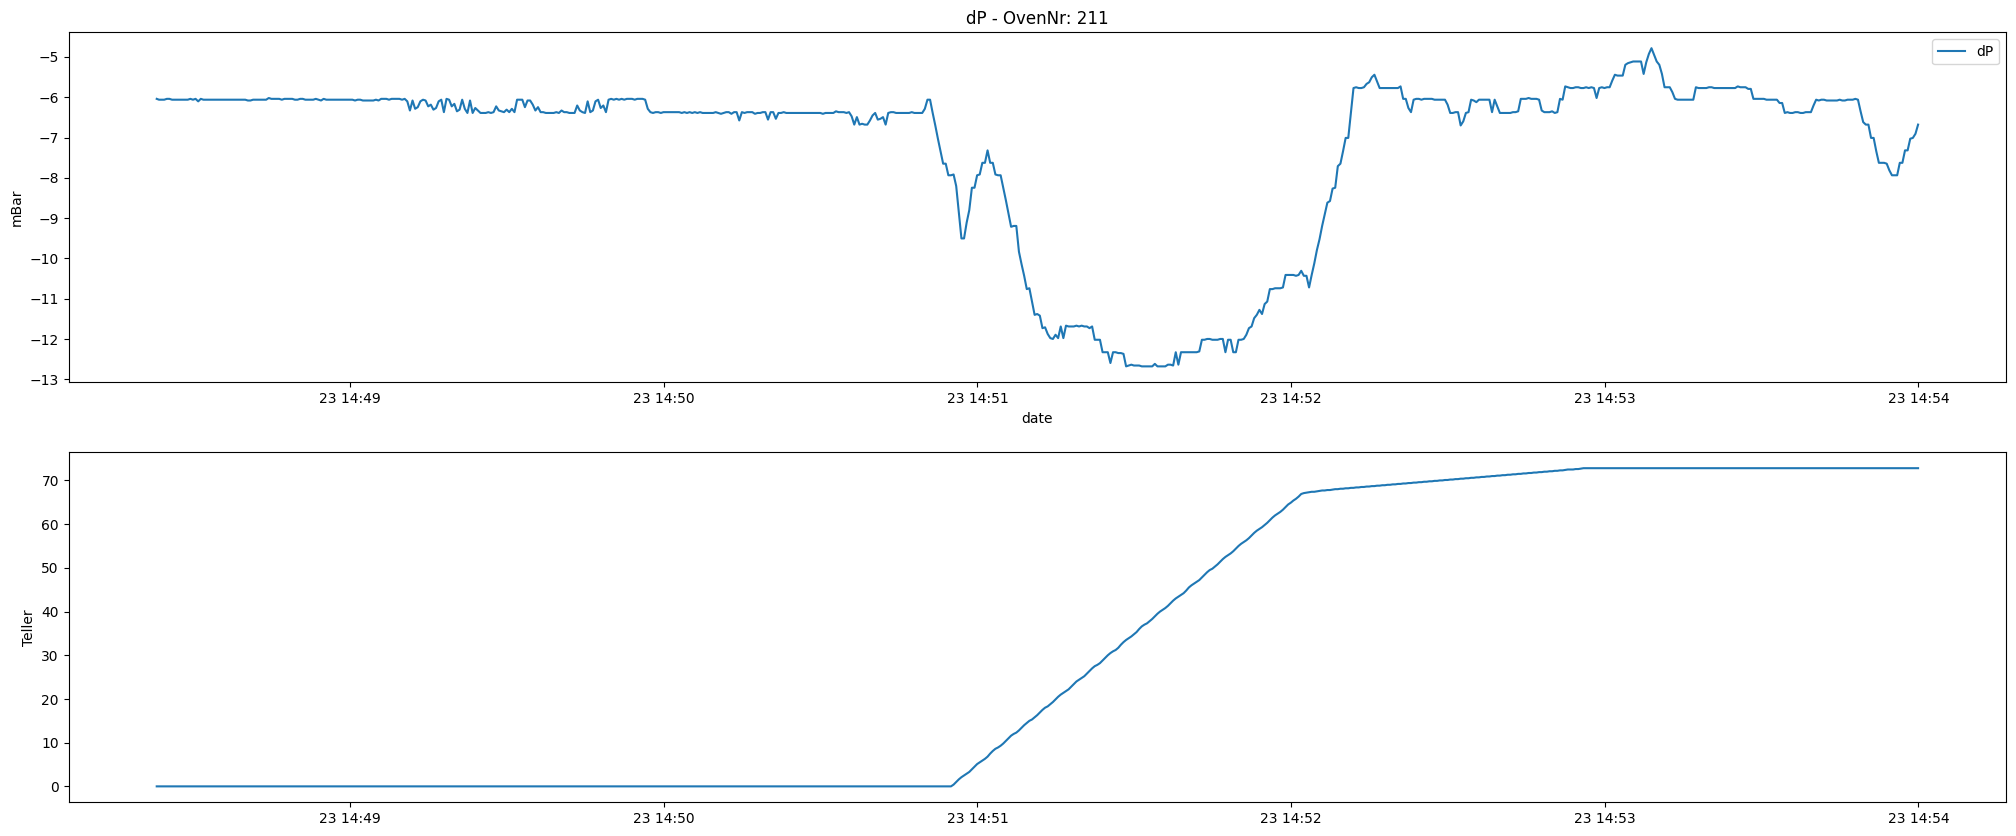

In [22]:
SubsetIndex = 12

# Ovennummer bepalen
OvenNr = list_subsets[SubsetIndex]['OvenNr'].iloc[0]

# Figuur plotten
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(
    list_subsets[SubsetIndex].index,
    list_subsets[SubsetIndex]['dP'].values,
    label='dP',
)
ax2.plot(
    list_subsets[SubsetIndex].index,
    list_subsets[SubsetIndex]['Vijzel1'].values,
    label='Vijzel',
)
ax1.set_xlabel('date')
ax1.set_ylabel('mBar')
ax2.set_ylabel('Teller')
ax1.set_title(f'dP - OvenNr: {OvenNr}')
ax1.legend()

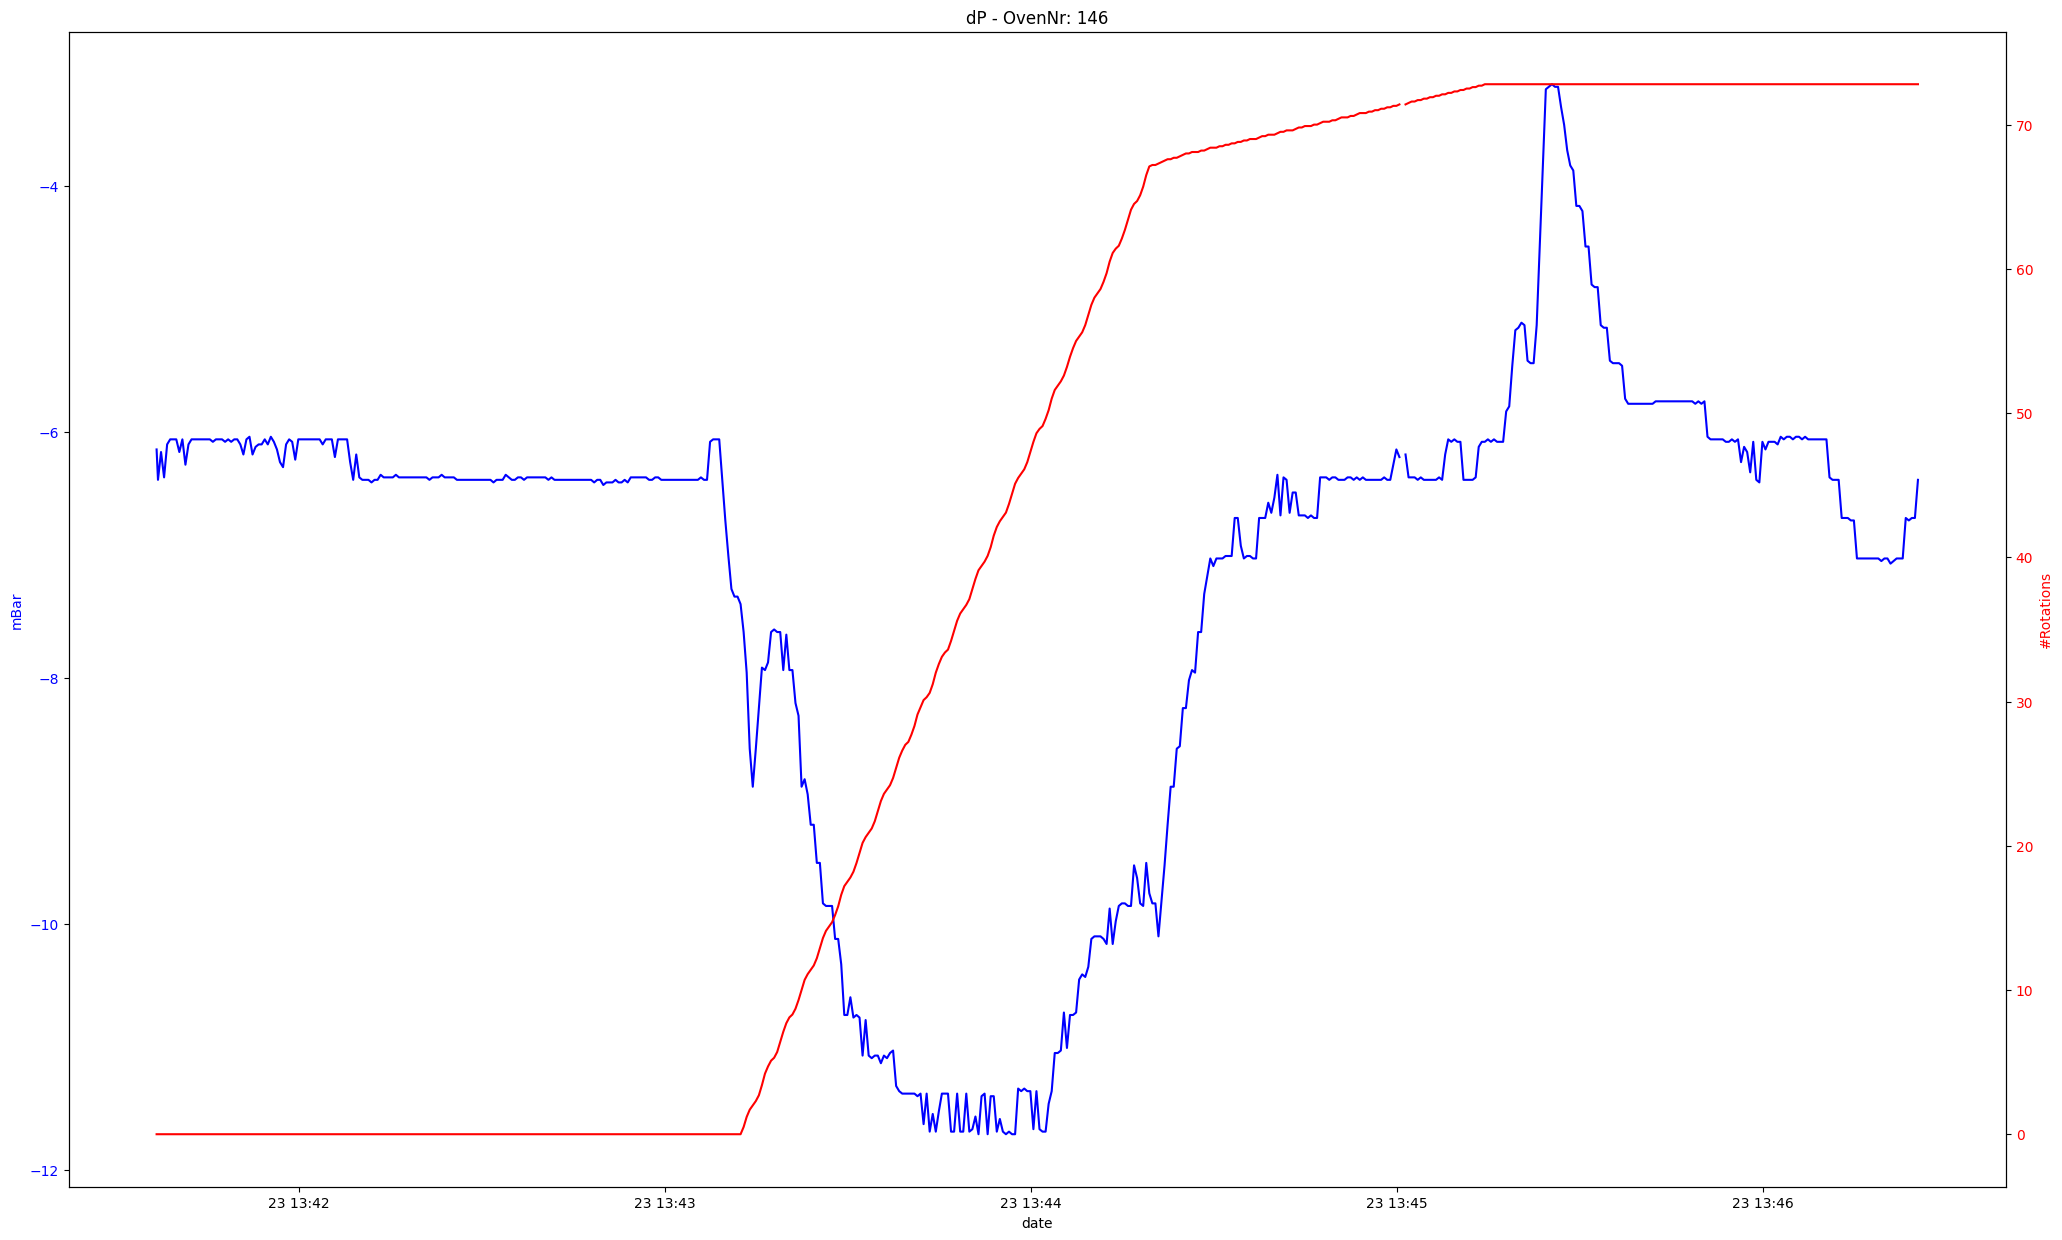

In [23]:
SubsetIndex = 5

# Ovennummer bepalen
OvenNr = list_subsets[SubsetIndex]['OvenNr'].iloc[0]

# Figuur plotten
fig, ax1 = plt.subplots(figsize=(25, 15))

# Plotting the first axis
ax1.plot(
    list_subsets[SubsetIndex].index,
    list_subsets[SubsetIndex]['dP'].values,
    'b-',
    label='dP',
)
ax1.set_xlabel('date')
ax1.set_ylabel('mBar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating the second axis
ax2 = ax1.twinx()
ax2.plot(
    list_subsets[SubsetIndex].index,
    list_subsets[SubsetIndex]['Vijzel1'].values,
    'r-',
    label='Vijzel',
)
ax2.set_ylabel('#Rotations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title(f'dP - OvenNr: {OvenNr}')
plt.show()
